In [1]:
from keras.applications import VGG16
from keras import Model

# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.applications.vgg16 import preprocess_input
from keras.models import save_model


from scipy.spatial.distance import cosine

from matplotlib import pyplot as plt

import os
import cv2
import pickle
from tqdm import tqdm
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
def create_vgg16_feature_extractor_model():
  vgg16_model = VGG16()
  model = Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)
  return model


In [3]:
def plot_one_image_features(one_image_features):
  # plt.figure(figsize=(16,4))
  plt.plot(one_image_features)

In [4]:
def get_one_image_features(image_path):
  # load an image from file
  one_image = load_img(image_path, target_size=(224, 224))
  # convert the image pixels to a numpy array
  one_image = img_to_array(one_image)
  # reshape data for the model
  one_image = one_image.reshape((1, one_image.shape[0], one_image.shape[1], one_image.shape[2]))
  # prepare the image for the VGG model
  one_image = preprocess_input(one_image)
  # get extracted features
  one_image_features = model.predict(one_image)
  print(f'Features Shape of One Input Image: {one_image_features.shape}')
  print(f'Features Dimension of One Input Image: {one_image_features.ndim}')
  print(f'Features of One Input Image: {one_image_features}')

  return one_image_features[0]

In [5]:
def get_all_images_features(folder_path):
  all_images_features = []
  print("Preapring Feature Vector for all Images")
  for img in tqdm(os.listdir(folder_path)):
    # image_path
    image_path = folder_path + '/' + img
    # load an image from file
    image = load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get extracted features
    feature = model.predict(image)
    # append feature in a list
    all_images_features.append(feature[0])
    # Check Shape
  return all_images_features

In [6]:
def plot_matching_images(all_cosine_distance):
  plt.figure(figsize=(10,5))
  all_db_images = os.listdir(all_images_path)
  all_cosine_distance = sorted(all_cosine_distance)
  for idx,i in enumerate(all_cosine_distance[1:10]):
    img = cv2.imread(all_images_path + '/' + all_db_images[i[1]])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(4,3,idx+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(all_db_images[i[1]] + '=' + str(round(i[0],2)))
    plt.tight_layout()
  plt.show()

In [7]:

def calculate_cosine_distance_with_all_DB_images(query_image_features, all_images_features):
  all_cosine_distance = []
  print("Calculating Cosine Distance with all Images")
  for idx,f in enumerate(all_images_features):
    cos_distance = cosine(query_image_features, f)
    all_cosine_distance.append([cos_distance, idx])
  return all_cosine_distance

In [8]:
def find_matching_image(query_image_path):
  query_image_features = get_one_image_features(query_image_path)
  all_cosine_distance = calculate_cosine_distance_with_all_DB_images(query_image_features, all_images_features)
  plot_matching_images(all_cosine_distance)

In [9]:
model = create_vgg16_feature_extractor_model()

all_images_path = "dataset2"

all_images_features = get_all_images_features(all_images_path)

print(f'Length of all_images_features : {len(all_images_features)}')
print(f'Shape of all_images_features : {all_images_features[0].shape}')

Preapring Feature Vector for all Images


  0%|                                                                                          | 0/205 [00:00<?, ?it/s]

1/1 [==============================] - 1s 893ms/step


  0%|▍                                                                                 | 1/205 [00:01<03:34,  1.05s/it]

1/1 [==============================] - 0s 418ms/step


  1%|▊                                                                                 | 2/205 [00:01<02:29,  1.35it/s]

1/1 [==============================] - 0s 403ms/step


  1%|█▏                                                                                | 3/205 [00:02<02:07,  1.59it/s]

1/1 [==============================] - 0s 400ms/step


  2%|█▌                                                                                | 4/205 [00:02<01:56,  1.72it/s]

1/1 [==============================] - 0s 420ms/step


  2%|██                                                                                | 5/205 [00:03<01:51,  1.79it/s]

1/1 [==============================] - 0s 395ms/step


  3%|██▍                                                                               | 6/205 [00:03<01:47,  1.86it/s]

1/1 [==============================] - 0s 401ms/step


  3%|██▊                                                                               | 7/205 [00:04<01:44,  1.90it/s]

1/1 [==============================] - 0s 427ms/step


  4%|███▏                                                                              | 8/205 [00:04<01:44,  1.89it/s]

1/1 [==============================] - 0s 430ms/step


  4%|███▌                                                                              | 9/205 [00:05<01:43,  1.90it/s]

1/1 [==============================] - 0s 405ms/step


  5%|███▉                                                                             | 10/205 [00:05<01:40,  1.93it/s]

1/1 [==============================] - 0s 418ms/step


  5%|████▎                                                                            | 11/205 [00:06<01:40,  1.92it/s]

1/1 [==============================] - 0s 400ms/step


  6%|████▋                                                                            | 12/205 [00:06<01:38,  1.95it/s]

1/1 [==============================] - 0s 416ms/step


  6%|█████▏                                                                           | 13/205 [00:07<01:38,  1.95it/s]

1/1 [==============================] - 0s 405ms/step


  7%|█████▌                                                                           | 14/205 [00:07<01:36,  1.97it/s]

1/1 [==============================] - 0s 403ms/step


  7%|█████▉                                                                           | 15/205 [00:08<01:36,  1.97it/s]

1/1 [==============================] - 0s 410ms/step


  8%|██████▎                                                                          | 16/205 [00:08<01:35,  1.98it/s]

1/1 [==============================] - 0s 409ms/step


  8%|██████▋                                                                          | 17/205 [00:09<01:35,  1.97it/s]

1/1 [==============================] - 0s 415ms/step


  9%|███████                                                                          | 18/205 [00:09<01:34,  1.97it/s]

1/1 [==============================] - 0s 413ms/step


  9%|███████▌                                                                         | 19/205 [00:10<01:34,  1.97it/s]

1/1 [==============================] - 0s 400ms/step


 10%|███████▉                                                                         | 20/205 [00:10<01:34,  1.96it/s]

1/1 [==============================] - 0s 413ms/step


 10%|████████▎                                                                        | 21/205 [00:11<01:33,  1.96it/s]

1/1 [==============================] - 0s 437ms/step


 11%|████████▋                                                                        | 22/205 [00:11<01:34,  1.93it/s]

1/1 [==============================] - 0s 398ms/step


 11%|█████████                                                                        | 23/205 [00:12<01:32,  1.97it/s]

1/1 [==============================] - 0s 407ms/step


 12%|█████████▍                                                                       | 24/205 [00:12<01:31,  1.98it/s]

1/1 [==============================] - 0s 423ms/step


 12%|█████████▉                                                                       | 25/205 [00:13<01:31,  1.97it/s]

1/1 [==============================] - 0s 437ms/step


 13%|██████████▎                                                                      | 26/205 [00:13<01:31,  1.95it/s]

1/1 [==============================] - 0s 400ms/step


 13%|██████████▋                                                                      | 27/205 [00:14<01:30,  1.97it/s]

1/1 [==============================] - 0s 418ms/step


 14%|███████████                                                                      | 28/205 [00:14<01:30,  1.96it/s]

1/1 [==============================] - 0s 418ms/step


 14%|███████████▍                                                                     | 29/205 [00:15<01:29,  1.96it/s]

1/1 [==============================] - 0s 405ms/step


 15%|███████████▊                                                                     | 30/205 [00:15<01:29,  1.96it/s]

1/1 [==============================] - 0s 420ms/step


 15%|████████████▏                                                                    | 31/205 [00:16<01:29,  1.95it/s]

1/1 [==============================] - 0s 426ms/step


 16%|████████████▋                                                                    | 32/205 [00:16<01:28,  1.95it/s]

1/1 [==============================] - 0s 409ms/step


 16%|█████████████                                                                    | 33/205 [00:17<01:27,  1.96it/s]

1/1 [==============================] - 0s 401ms/step


 17%|█████████████▍                                                                   | 34/205 [00:17<01:26,  1.98it/s]

1/1 [==============================] - 0s 410ms/step


 17%|█████████████▊                                                                   | 35/205 [00:18<01:25,  1.98it/s]

1/1 [==============================] - 0s 395ms/step


 18%|██████████████▏                                                                  | 36/205 [00:18<01:24,  2.00it/s]

1/1 [==============================] - 0s 391ms/step


 18%|██████████████▌                                                                  | 37/205 [00:19<01:23,  2.02it/s]

1/1 [==============================] - 0s 409ms/step


 19%|███████████████                                                                  | 38/205 [00:19<01:22,  2.01it/s]

1/1 [==============================] - 0s 415ms/step


 19%|███████████████▍                                                                 | 39/205 [00:20<01:23,  1.99it/s]

1/1 [==============================] - 0s 416ms/step


 20%|███████████████▊                                                                 | 40/205 [00:20<01:22,  1.99it/s]

1/1 [==============================] - 0s 395ms/step


 20%|████████████████▏                                                                | 41/205 [00:21<01:22,  2.00it/s]

1/1 [==============================] - 0s 442ms/step


 20%|████████████████▌                                                                | 42/205 [00:21<01:23,  1.95it/s]

1/1 [==============================] - 0s 450ms/step


 21%|████████████████▉                                                                | 43/205 [00:22<01:25,  1.89it/s]

1/1 [==============================] - 0s 415ms/step


 21%|█████████████████▍                                                               | 44/205 [00:22<01:24,  1.90it/s]

1/1 [==============================] - 0s 414ms/step


 22%|█████████████████▊                                                               | 45/205 [00:23<01:23,  1.93it/s]

1/1 [==============================] - 0s 405ms/step


 22%|██████████████████▏                                                              | 46/205 [00:23<01:21,  1.94it/s]

1/1 [==============================] - 0s 408ms/step


 23%|██████████████████▌                                                              | 47/205 [00:24<01:20,  1.96it/s]

1/1 [==============================] - 0s 431ms/step


 23%|██████████████████▉                                                              | 48/205 [00:25<01:21,  1.93it/s]

1/1 [==============================] - 0s 418ms/step


 24%|███████████████████▎                                                             | 49/205 [00:25<01:20,  1.93it/s]

1/1 [==============================] - 0s 417ms/step


 24%|███████████████████▊                                                             | 50/205 [00:26<01:19,  1.95it/s]

1/1 [==============================] - 0s 411ms/step


 25%|████████████████████▏                                                            | 51/205 [00:26<01:18,  1.95it/s]

1/1 [==============================] - 0s 394ms/step


 25%|████████████████████▌                                                            | 52/205 [00:27<01:17,  1.98it/s]

1/1 [==============================] - 0s 435ms/step


 26%|████████████████████▉                                                            | 53/205 [00:27<01:18,  1.94it/s]

1/1 [==============================] - 0s 440ms/step


 26%|█████████████████████▎                                                           | 54/205 [00:28<01:18,  1.91it/s]

1/1 [==============================] - 0s 385ms/step


 27%|█████████████████████▋                                                           | 55/205 [00:28<01:16,  1.96it/s]

1/1 [==============================] - 0s 404ms/step


 27%|██████████████████████▏                                                          | 56/205 [00:29<01:15,  1.97it/s]

1/1 [==============================] - 0s 407ms/step


 28%|██████████████████████▌                                                          | 57/205 [00:29<01:14,  1.98it/s]

1/1 [==============================] - 0s 410ms/step


 28%|██████████████████████▉                                                          | 58/205 [00:30<01:15,  1.96it/s]

1/1 [==============================] - 0s 393ms/step


 29%|███████████████████████▎                                                         | 59/205 [00:30<01:13,  1.98it/s]

1/1 [==============================] - 0s 388ms/step


 29%|███████████████████████▋                                                         | 60/205 [00:31<01:12,  2.01it/s]

1/1 [==============================] - 0s 410ms/step


 30%|████████████████████████                                                         | 61/205 [00:31<01:11,  2.01it/s]

1/1 [==============================] - 0s 367ms/step


 30%|████████████████████████▍                                                        | 62/205 [00:32<01:09,  2.07it/s]

1/1 [==============================] - 0s 421ms/step


 31%|████████████████████████▉                                                        | 63/205 [00:32<01:09,  2.03it/s]

1/1 [==============================] - 0s 485ms/step


 31%|█████████████████████████▎                                                       | 64/205 [00:33<01:13,  1.92it/s]

1/1 [==============================] - 0s 484ms/step


 32%|█████████████████████████▋                                                       | 65/205 [00:33<01:15,  1.84it/s]

1/1 [==============================] - 0s 460ms/step


 32%|██████████████████████████                                                       | 66/205 [00:34<01:17,  1.80it/s]

1/1 [==============================] - 0s 473ms/step


 33%|██████████████████████████▍                                                      | 67/205 [00:34<01:18,  1.77it/s]

1/1 [==============================] - 0s 461ms/step


 33%|██████████████████████████▊                                                      | 68/205 [00:35<01:18,  1.75it/s]

1/1 [==============================] - 0s 490ms/step


 34%|███████████████████████████▎                                                     | 69/205 [00:36<01:18,  1.74it/s]

1/1 [==============================] - 0s 474ms/step


 34%|███████████████████████████▋                                                     | 70/205 [00:36<01:17,  1.74it/s]

1/1 [==============================] - 0s 465ms/step


 35%|████████████████████████████                                                     | 71/205 [00:37<01:17,  1.73it/s]

1/1 [==============================] - 0s 480ms/step


 35%|████████████████████████████▍                                                    | 72/205 [00:37<01:16,  1.73it/s]

1/1 [==============================] - 0s 480ms/step


 36%|████████████████████████████▊                                                    | 73/205 [00:38<01:16,  1.73it/s]

1/1 [==============================] - 0s 452ms/step


 36%|█████████████████████████████▏                                                   | 74/205 [00:38<01:14,  1.75it/s]

1/1 [==============================] - 0s 481ms/step


 37%|█████████████████████████████▋                                                   | 75/205 [00:39<01:14,  1.74it/s]

1/1 [==============================] - 0s 478ms/step


 37%|██████████████████████████████                                                   | 76/205 [00:40<01:14,  1.74it/s]

1/1 [==============================] - 0s 469ms/step


 38%|██████████████████████████████▍                                                  | 77/205 [00:40<01:13,  1.74it/s]

1/1 [==============================] - 0s 467ms/step


 38%|██████████████████████████████▊                                                  | 78/205 [00:41<01:13,  1.73it/s]

1/1 [==============================] - 0s 471ms/step


 39%|███████████████████████████████▏                                                 | 79/205 [00:41<01:12,  1.73it/s]

1/1 [==============================] - 0s 480ms/step


 39%|███████████████████████████████▌                                                 | 80/205 [00:42<01:12,  1.71it/s]

1/1 [==============================] - 0s 470ms/step


 40%|████████████████████████████████                                                 | 81/205 [00:43<01:12,  1.72it/s]

1/1 [==============================] - 0s 463ms/step


 40%|████████████████████████████████▍                                                | 82/205 [00:43<01:10,  1.74it/s]

1/1 [==============================] - 0s 460ms/step


 40%|████████████████████████████████▊                                                | 83/205 [00:44<01:10,  1.73it/s]

1/1 [==============================] - 0s 478ms/step


 41%|█████████████████████████████████▏                                               | 84/205 [00:44<01:10,  1.72it/s]

1/1 [==============================] - 0s 466ms/step


 41%|█████████████████████████████████▌                                               | 85/205 [00:45<01:10,  1.71it/s]

1/1 [==============================] - 0s 459ms/step


 42%|█████████████████████████████████▉                                               | 86/205 [00:45<01:08,  1.73it/s]

1/1 [==============================] - 0s 460ms/step


 42%|██████████████████████████████████▍                                              | 87/205 [00:46<01:07,  1.74it/s]

1/1 [==============================] - 0s 470ms/step


 43%|██████████████████████████████████▊                                              | 88/205 [00:47<01:07,  1.73it/s]

1/1 [==============================] - 0s 465ms/step


 43%|███████████████████████████████████▏                                             | 89/205 [00:47<01:06,  1.73it/s]

1/1 [==============================] - 0s 465ms/step


 44%|███████████████████████████████████▌                                             | 90/205 [00:48<01:06,  1.74it/s]

1/1 [==============================] - 0s 455ms/step


 44%|███████████████████████████████████▉                                             | 91/205 [00:48<01:05,  1.74it/s]

1/1 [==============================] - 0s 455ms/step


 45%|████████████████████████████████████▎                                            | 92/205 [00:49<01:04,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


 45%|████████████████████████████████████▋                                            | 93/205 [00:49<01:03,  1.77it/s]

1/1 [==============================] - 0s 410ms/step


 46%|█████████████████████████████████████▏                                           | 94/205 [00:50<01:00,  1.83it/s]

1/1 [==============================] - 0s 416ms/step


 46%|█████████████████████████████████████▌                                           | 95/205 [00:50<00:58,  1.87it/s]

1/1 [==============================] - 0s 390ms/step


 47%|█████████████████████████████████████▉                                           | 96/205 [00:51<00:56,  1.92it/s]

1/1 [==============================] - 0s 407ms/step


 47%|██████████████████████████████████████▎                                          | 97/205 [00:51<00:55,  1.94it/s]

1/1 [==============================] - 0s 403ms/step


 48%|██████████████████████████████████████▋                                          | 98/205 [00:52<00:54,  1.97it/s]

1/1 [==============================] - 0s 399ms/step


 48%|███████████████████████████████████████                                          | 99/205 [00:52<00:53,  1.98it/s]

1/1 [==============================] - 0s 400ms/step


 49%|███████████████████████████████████████                                         | 100/205 [00:53<00:52,  1.99it/s]

1/1 [==============================] - 0s 404ms/step


 49%|███████████████████████████████████████▍                                        | 101/205 [00:53<00:52,  1.99it/s]

1/1 [==============================] - 0s 447ms/step


 50%|███████████████████████████████████████▊                                        | 102/205 [00:54<00:53,  1.94it/s]

1/1 [==============================] - 0s 440ms/step


 50%|████████████████████████████████████████▏                                       | 103/205 [00:54<00:53,  1.90it/s]

1/1 [==============================] - 0s 433ms/step


 51%|████████████████████████████████████████▌                                       | 104/205 [00:55<00:53,  1.89it/s]

1/1 [==============================] - 0s 400ms/step


 51%|████████████████████████████████████████▉                                       | 105/205 [00:56<00:52,  1.92it/s]

1/1 [==============================] - 0s 396ms/step


 52%|█████████████████████████████████████████▎                                      | 106/205 [00:56<00:51,  1.93it/s]

1/1 [==============================] - 0s 400ms/step


 52%|█████████████████████████████████████████▊                                      | 107/205 [00:57<00:50,  1.96it/s]

1/1 [==============================] - 0s 418ms/step


 53%|██████████████████████████████████████████▏                                     | 108/205 [00:57<00:49,  1.95it/s]

1/1 [==============================] - 0s 395ms/step


 53%|██████████████████████████████████████████▌                                     | 109/205 [00:58<00:48,  1.96it/s]

1/1 [==============================] - 0s 485ms/step


 54%|██████████████████████████████████████████▉                                     | 110/205 [00:58<00:50,  1.87it/s]

1/1 [==============================] - 0s 461ms/step


 54%|███████████████████████████████████████████▎                                    | 111/205 [00:59<00:51,  1.84it/s]

1/1 [==============================] - 0s 418ms/step


 55%|███████████████████████████████████████████▋                                    | 112/205 [00:59<00:49,  1.88it/s]

1/1 [==============================] - 0s 409ms/step


 55%|████████████████████████████████████████████                                    | 113/205 [01:00<00:48,  1.91it/s]

1/1 [==============================] - 0s 407ms/step


 56%|████████████████████████████████████████████▍                                   | 114/205 [01:00<00:47,  1.93it/s]

1/1 [==============================] - 0s 420ms/step


 56%|████████████████████████████████████████████▉                                   | 115/205 [01:01<00:46,  1.94it/s]

1/1 [==============================] - 0s 408ms/step


 57%|█████████████████████████████████████████████▎                                  | 116/205 [01:01<00:45,  1.94it/s]

1/1 [==============================] - 0s 422ms/step


 57%|█████████████████████████████████████████████▋                                  | 117/205 [01:02<00:44,  1.96it/s]

1/1 [==============================] - 0s 394ms/step


 58%|██████████████████████████████████████████████                                  | 118/205 [01:02<00:43,  1.98it/s]

1/1 [==============================] - 0s 396ms/step


 58%|██████████████████████████████████████████████▍                                 | 119/205 [01:03<00:42,  2.00it/s]

1/1 [==============================] - 0s 390ms/step


 59%|██████████████████████████████████████████████▊                                 | 120/205 [01:03<00:41,  2.03it/s]

1/1 [==============================] - 0s 390ms/step


 59%|███████████████████████████████████████████████▏                                | 121/205 [01:04<00:40,  2.05it/s]

1/1 [==============================] - 0s 398ms/step


 60%|███████████████████████████████████████████████▌                                | 122/205 [01:04<00:40,  2.03it/s]

1/1 [==============================] - 0s 391ms/step


 60%|████████████████████████████████████████████████                                | 123/205 [01:05<00:40,  2.05it/s]

1/1 [==============================] - 0s 401ms/step


 60%|████████████████████████████████████████████████▍                               | 124/205 [01:05<00:39,  2.05it/s]

1/1 [==============================] - 0s 407ms/step


 61%|████████████████████████████████████████████████▊                               | 125/205 [01:06<00:39,  2.03it/s]

1/1 [==============================] - 0s 446ms/step


 61%|█████████████████████████████████████████████████▏                              | 126/205 [01:06<00:40,  1.96it/s]

1/1 [==============================] - 0s 438ms/step


 62%|█████████████████████████████████████████████████▌                              | 127/205 [01:07<00:40,  1.94it/s]

1/1 [==============================] - 0s 395ms/step


 62%|█████████████████████████████████████████████████▉                              | 128/205 [01:07<00:39,  1.96it/s]

1/1 [==============================] - 0s 410ms/step


 63%|██████████████████████████████████████████████████▎                             | 129/205 [01:08<00:38,  1.97it/s]

1/1 [==============================] - 0s 412ms/step


 63%|██████████████████████████████████████████████████▋                             | 130/205 [01:08<00:37,  1.98it/s]

1/1 [==============================] - 0s 390ms/step


 64%|███████████████████████████████████████████████████                             | 131/205 [01:09<00:37,  1.99it/s]

1/1 [==============================] - 0s 400ms/step


 64%|███████████████████████████████████████████████████▌                            | 132/205 [01:09<00:36,  2.00it/s]

1/1 [==============================] - 0s 417ms/step


 65%|███████████████████████████████████████████████████▉                            | 133/205 [01:10<00:36,  1.99it/s]

1/1 [==============================] - 0s 410ms/step


 65%|████████████████████████████████████████████████████▎                           | 134/205 [01:10<00:35,  1.99it/s]

1/1 [==============================] - 0s 400ms/step


 66%|████████████████████████████████████████████████████▋                           | 135/205 [01:11<00:35,  1.98it/s]

1/1 [==============================] - 0s 401ms/step


 66%|█████████████████████████████████████████████████████                           | 136/205 [01:11<00:34,  2.00it/s]

1/1 [==============================] - 0s 400ms/step


 67%|█████████████████████████████████████████████████████▍                          | 137/205 [01:12<00:34,  2.00it/s]

1/1 [==============================] - 0s 445ms/step


 67%|█████████████████████████████████████████████████████▊                          | 138/205 [01:12<00:34,  1.97it/s]

1/1 [==============================] - 0s 420ms/step


 68%|██████████████████████████████████████████████████████▏                         | 139/205 [01:13<00:33,  1.95it/s]

1/1 [==============================] - 0s 393ms/step


 68%|██████████████████████████████████████████████████████▋                         | 140/205 [01:13<00:32,  1.99it/s]

1/1 [==============================] - 0s 396ms/step


 69%|███████████████████████████████████████████████████████                         | 141/205 [01:14<00:31,  2.00it/s]

1/1 [==============================] - 0s 397ms/step


 69%|███████████████████████████████████████████████████████▍                        | 142/205 [01:14<00:31,  2.01it/s]

1/1 [==============================] - 0s 397ms/step


 70%|███████████████████████████████████████████████████████▊                        | 143/205 [01:15<00:30,  2.02it/s]

1/1 [==============================] - 0s 400ms/step


 70%|████████████████████████████████████████████████████████▏                       | 144/205 [01:15<00:30,  2.02it/s]

1/1 [==============================] - 0s 389ms/step


 71%|████████████████████████████████████████████████████████▌                       | 145/205 [01:16<00:29,  2.03it/s]

1/1 [==============================] - 0s 400ms/step


 71%|████████████████████████████████████████████████████████▉                       | 146/205 [01:16<00:29,  2.02it/s]

1/1 [==============================] - 0s 408ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 147/205 [01:17<00:28,  2.02it/s]

1/1 [==============================] - 0s 403ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 148/205 [01:17<00:28,  2.01it/s]

1/1 [==============================] - 0s 402ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 149/205 [01:18<00:27,  2.03it/s]

1/1 [==============================] - 0s 409ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 150/205 [01:18<00:27,  2.01it/s]

1/1 [==============================] - 0s 400ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 151/205 [01:19<00:26,  2.02it/s]

1/1 [==============================] - 0s 402ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 152/205 [01:19<00:26,  2.02it/s]

1/1 [==============================] - 0s 410ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 153/205 [01:20<00:25,  2.01it/s]

1/1 [==============================] - 0s 400ms/step


 75%|████████████████████████████████████████████████████████████                    | 154/205 [01:20<00:25,  2.02it/s]

1/1 [==============================] - 0s 400ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 155/205 [01:21<00:24,  2.01it/s]

1/1 [==============================] - 0s 396ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 156/205 [01:21<00:24,  2.02it/s]

1/1 [==============================] - 0s 440ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 157/205 [01:22<00:24,  1.97it/s]

1/1 [==============================] - 0s 403ms/step


 77%|█████████████████████████████████████████████████████████████▋                  | 158/205 [01:22<00:23,  1.97it/s]

1/1 [==============================] - 0s 385ms/step


 78%|██████████████████████████████████████████████████████████████                  | 159/205 [01:23<00:22,  2.00it/s]

1/1 [==============================] - 0s 400ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 160/205 [01:23<00:22,  2.02it/s]

1/1 [==============================] - 0s 390ms/step


 79%|██████████████████████████████████████████████████████████████▊                 | 161/205 [01:24<00:21,  2.04it/s]

1/1 [==============================] - 0s 409ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 162/205 [01:24<00:21,  2.02it/s]

1/1 [==============================] - 0s 404ms/step


 80%|███████████████████████████████████████████████████████████████▌                | 163/205 [01:25<00:20,  2.03it/s]

1/1 [==============================] - 0s 409ms/step


 80%|████████████████████████████████████████████████████████████████                | 164/205 [01:25<00:20,  2.00it/s]

1/1 [==============================] - 0s 444ms/step


 80%|████████████████████████████████████████████████████████████████▍               | 165/205 [01:26<00:20,  1.96it/s]

1/1 [==============================] - 0s 407ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 166/205 [01:26<00:19,  1.98it/s]

1/1 [==============================] - 0s 443ms/step


 81%|█████████████████████████████████████████████████████████████████▏              | 167/205 [01:27<00:19,  1.96it/s]

1/1 [==============================] - 0s 440ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 168/205 [01:27<00:19,  1.93it/s]

1/1 [==============================] - 0s 435ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 169/205 [01:28<00:18,  1.92it/s]

1/1 [==============================] - 0s 426ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 170/205 [01:28<00:18,  1.92it/s]

1/1 [==============================] - 0s 392ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 171/205 [01:29<00:17,  1.95it/s]

1/1 [==============================] - 0s 402ms/step


 84%|███████████████████████████████████████████████████████████████████             | 172/205 [01:29<00:16,  1.97it/s]

1/1 [==============================] - 0s 387ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 173/205 [01:30<00:15,  2.01it/s]

1/1 [==============================] - 0s 395ms/step


 85%|███████████████████████████████████████████████████████████████████▉            | 174/205 [01:30<00:15,  1.99it/s]

1/1 [==============================] - 0s 411ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 175/205 [01:31<00:15,  1.99it/s]

1/1 [==============================] - 0s 409ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 176/205 [01:31<00:14,  1.97it/s]

1/1 [==============================] - 0s 402ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 177/205 [01:32<00:14,  1.97it/s]

1/1 [==============================] - 0s 388ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 178/205 [01:32<00:13,  1.97it/s]

1/1 [==============================] - 0s 389ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 179/205 [01:33<00:13,  1.98it/s]

1/1 [==============================] - 0s 407ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 180/205 [01:33<00:12,  1.97it/s]

1/1 [==============================] - 0s 384ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 181/205 [01:34<00:12,  1.98it/s]

1/1 [==============================] - 0s 399ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 182/205 [01:34<00:11,  1.99it/s]

1/1 [==============================] - 0s 403ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 183/205 [01:35<00:11,  1.98it/s]

1/1 [==============================] - 0s 392ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 184/205 [01:35<00:10,  1.98it/s]

1/1 [==============================] - 0s 396ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 185/205 [01:36<00:10,  1.98it/s]

1/1 [==============================] - 0s 400ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 186/205 [01:36<00:09,  1.99it/s]

1/1 [==============================] - 0s 410ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 187/205 [01:37<00:09,  1.99it/s]

1/1 [==============================] - 0s 407ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 188/205 [01:37<00:08,  1.97it/s]

1/1 [==============================] - 0s 405ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 189/205 [01:38<00:08,  1.97it/s]

1/1 [==============================] - 0s 396ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 190/205 [01:38<00:07,  1.99it/s]

1/1 [==============================] - 0s 410ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 191/205 [01:39<00:07,  1.97it/s]

1/1 [==============================] - 0s 400ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 192/205 [01:39<00:06,  1.97it/s]

1/1 [==============================] - 0s 380ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 193/205 [01:40<00:06,  1.99it/s]

1/1 [==============================] - 0s 409ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 194/205 [01:40<00:05,  1.97it/s]

1/1 [==============================] - 0s 432ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 195/205 [01:41<00:05,  1.93it/s]

1/1 [==============================] - 0s 405ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 196/205 [01:41<00:04,  1.94it/s]

1/1 [==============================] - 0s 398ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 197/205 [01:42<00:04,  1.95it/s]

1/1 [==============================] - 0s 395ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 198/205 [01:42<00:03,  1.94it/s]

1/1 [==============================] - 0s 407ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 199/205 [01:43<00:03,  1.94it/s]

1/1 [==============================] - 0s 394ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 200/205 [01:43<00:02,  1.96it/s]

1/1 [==============================] - 0s 404ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 201/205 [01:44<00:02,  1.96it/s]

1/1 [==============================] - 0s 413ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 202/205 [01:45<00:01,  1.96it/s]

1/1 [==============================] - 0s 405ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 203/205 [01:45<00:01,  1.95it/s]

1/1 [==============================] - 0s 409ms/step


100%|███████████████████████████████████████████████████████████████████████████████▌| 204/205 [01:46<00:00,  1.94it/s]

1/1 [==============================] - 0s 408ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 205/205 [01:46<00:00,  1.92it/s]

Length of all_images_features : 205
Shape of all_images_features : (4096,)


1/1 [==============================] - 0s 406ms/step
Features Shape of One Input Image: (1, 4096)
Features Dimension of One Input Image: 2
Features of One Input Image: [[0.        1.1336988 0.        ... 0.        0.        0.9545146]]
Calculating Cosine Distance with all Images


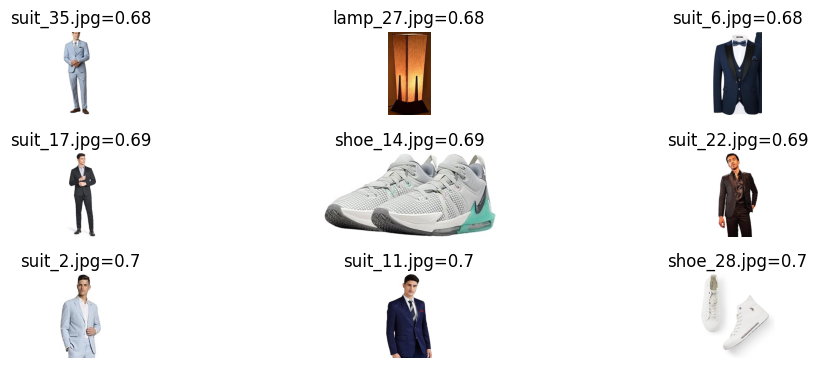

In [15]:
query_image_path = "try\WhatsApp Image 2024-06-21 at 16.57.26.jpeg"
find_matching_image(query_image_path)

In [16]:

def save_model_and_features():
  save_model(model, 'vgg_feature_extraction_model.h5')
  pickle.dump(all_images_features, open('vgg16_features.pkl', 'wb+'))

In [17]:
save_model_and_features()

1/1 [==============================] - 0s 421ms/step
Features Shape of One Input Image: (1, 4096)
Features Dimension of One Input Image: 2
Features of One Input Image: [[0.        0.        0.        ... 0.        0.        3.1449347]]
Calculating Cosine Distance with all Images


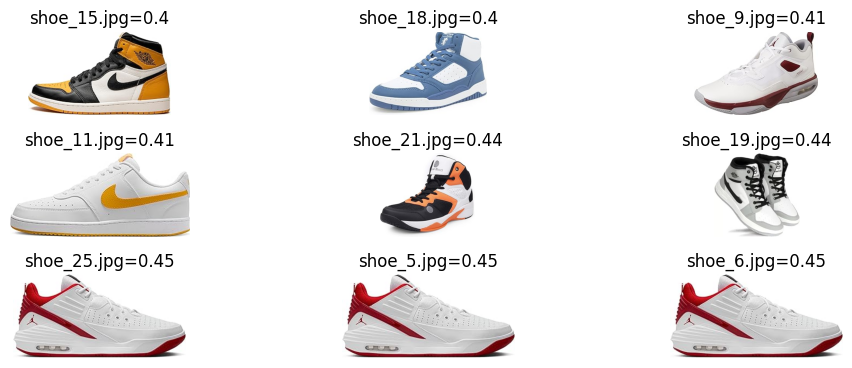

In [21]:
query_image_path = "try/img3.png"
find_matching_image(query_image_path)